In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from scipy import stats 
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

import pydotplus

In [2]:
# To show the complete datase on printing the dataframe.
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

In [3]:
#Load the dataset
dataset=pd.read_excel('Absenteeism_at_work_Project.xls')
dataset1=dataset.copy()

In [4]:
#Check the dataset size and columns
print("Shape of dataset:",dataset.shape)
print("Dataset Columns:",dataset.columns)
columns=dataset.columns

Shape of dataset: (740, 21)
Dataset Columns: Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


In [5]:
#Print the sample rows of the dataset
dataset.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
#print the data characterstics
dataset.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,734.000000,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,3.792705,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [7]:
#check the data types of the columns
dataset.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

# Preprocessing

In [8]:
#Replace the 0 with nan as these are catagorical variables and there is no label for it
dataset['Reason for absence']=pd.to_numeric(dataset['Reason for absence'].replace(0,''))
dataset['Month of absence']=pd.to_numeric(dataset['Month of absence'].replace(0,''))

In [9]:
# Print the unique value count for each columns
for column in dataset.columns:
    print(column, dataset[column].unique().shape[0])

ID 36
Reason for absence 28
Month of absence 13
Day of the week 5
Seasons 4
Transportation expense 25
Distance from Residence to Work 26
Service time 19
Age 23
Work load Average/day  39
Hit target 14
Disciplinary failure 3
Education 5
Son 6
Social drinker 3
Social smoker 3
Pet 7
Weight 27
Height 15
Body mass index 18
Absenteeism time in hours 20


# Missing Value Analysis

In [10]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(dataset.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(dataset))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

print(missing_val)

                          Variables  Missing_percentage
0                Reason for absence            6.216216
1                   Body mass index            4.189189
2         Absenteeism time in hours            2.972973
3                            Height            1.891892
4            Work load Average/day             1.351351
5                         Education            1.351351
6            Transportation expense            0.945946
7                               Son            0.810811
8              Disciplinary failure            0.810811
9                        Hit target            0.810811
10                    Social smoker            0.540541
11                 Month of absence            0.540541
12                              Age            0.405405
13                     Service time            0.405405
14  Distance from Residence to Work            0.405405
15                   Social drinker            0.405405
16                              Pet            0

# Outlier Analysis

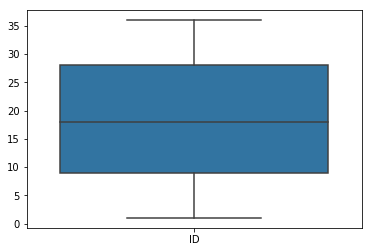

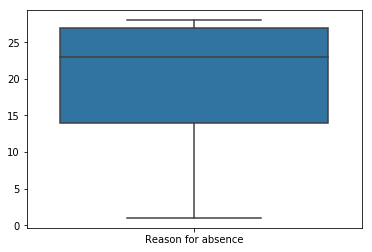

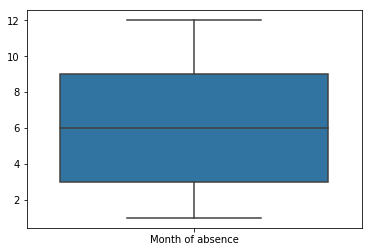

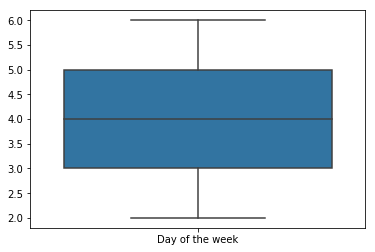

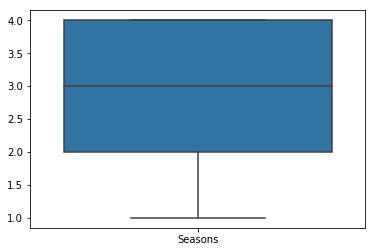

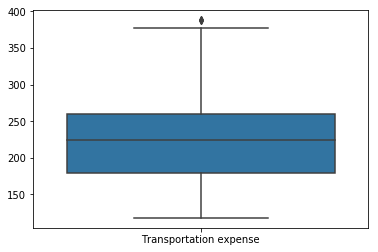

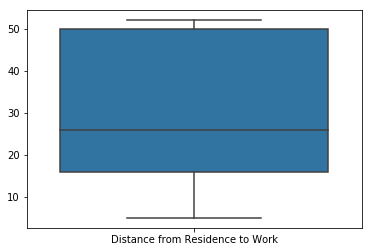

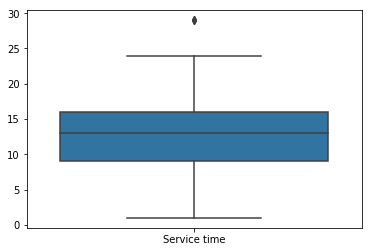

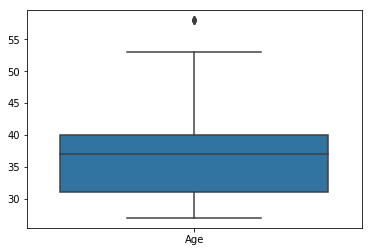

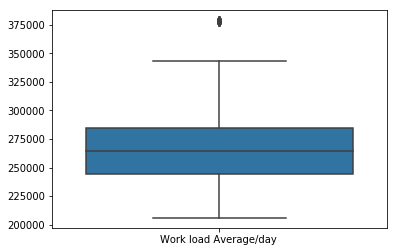

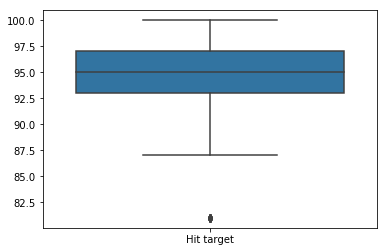

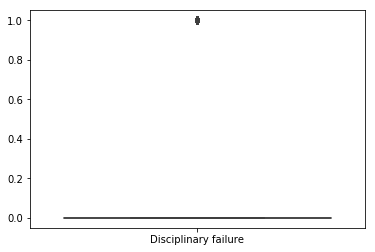

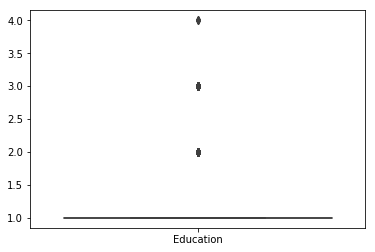

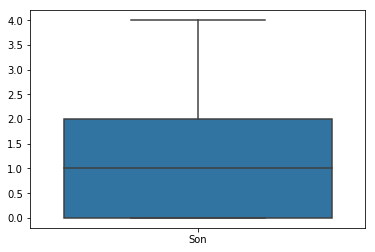

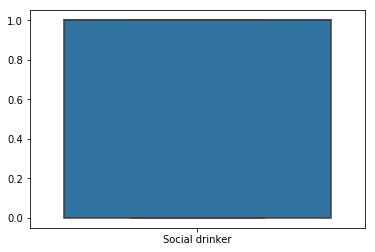

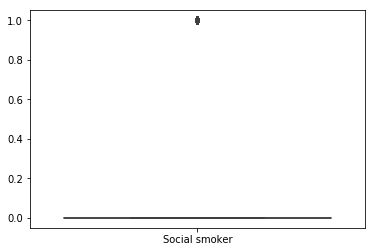

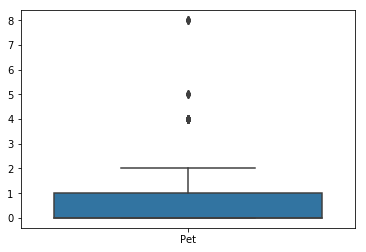

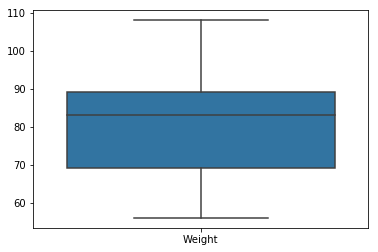

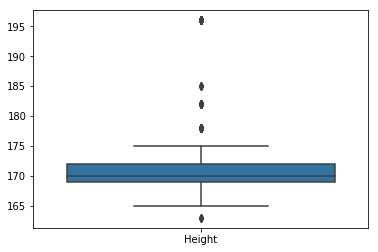

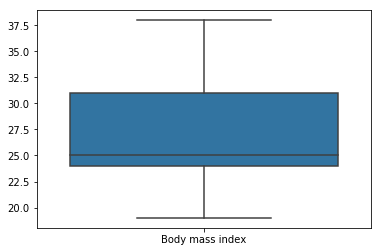

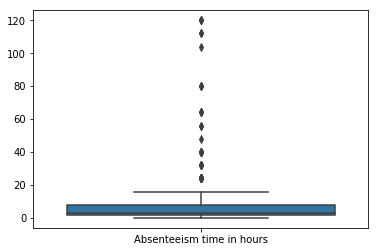

In [11]:
# Plot box plot for each of the column to check the outliers
for i in range(dataset.shape[1]):
    sb.boxplot(data=dataset.iloc[:,i:i+1])
    plt.savefig('./outlier/'+dataset.columns[i].replace('/',' ')+'.png')
    plt.show()

In [12]:
# Replace the outliers with the nan and print how many outliers are there in each column.
remove=False
print("NaN count before outlier detection=",dataset.isnull().sum().sum())
columns=dataset.columns
for i in [5,6,7,8,9,10,17,18]:
    initial=dataset.isnull().sum().sum()
    q25, q75=dataset.iloc[:,i].quantile(0.25), dataset.iloc[:,i].quantile(0.75)
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    if remove:
        dataset = dataset.drop(dataset[dataset.iloc[:,i] < min_val].index)
        dataset = dataset.drop(dataset[dataset.iloc[:,i] > max_val].index)
        print("For column",columns[i],"number of outliers replaced with NaN=",dataset.isnull().sum().sum()-initial)
    else:
        dataset.loc[dataset[columns[i]]<min_val,columns[i]] = np.nan
        dataset.loc[dataset[columns[i]]>max_val,columns[i]] = np.nan
        print("For column",columns[i],"number of outliers replaced with NaN=",dataset.isnull().sum().sum()-initial)
print("NaN count after outlier detection=",dataset.isnull().sum().sum())

NaN count before outlier detection= 181
For column Transportation expense number of outliers replaced with NaN= 3
For column Distance from Residence to Work number of outliers replaced with NaN= 0
For column Service time number of outliers replaced with NaN= 5
For column Age number of outliers replaced with NaN= 8
For column Work load Average/day  number of outliers replaced with NaN= 31
For column Hit target number of outliers replaced with NaN= 19
For column Weight number of outliers replaced with NaN= 0
For column Height number of outliers replaced with NaN= 119
NaN count after outlier detection= 366


# Impute Missing Values

In [13]:
#The data has a property. That in the dataset the value of some column is constact and same for one particular ID.
for column in dataset.columns:
    print(column, dataset[dataset['ID']==3][column].unique().shape[0])

ID 1
Reason for absence 14
Month of absence 13
Day of the week 5
Seasons 4
Transportation expense 2
Distance from Residence to Work 1
Service time 1
Age 1
Work load Average/day  29
Hit target 13
Disciplinary failure 2
Education 1
Son 1
Social drinker 1
Social smoker 1
Pet 1
Weight 1
Height 1
Body mass index 2
Absenteeism time in hours 9


In [14]:
#Goupby the values on the basis of ID. This result will be used to impute the variable value for a particular ID.
id_group=dataset1.dropna(axis=0).groupby(['ID'])['ID','Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target'
       , 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet','Weight', 'Height'].mean()

In [15]:
# Othre variables which do not follow that property are imputed with mode.
print(dataset.isnull().sum().sum())
impute = Imputer(strategy='most_frequent')
dataset.iloc[:,[1,2,3,4,11]]=impute.fit_transform(dataset.iloc[:,[1,2,3,4,11]])
print(dataset.isnull().sum().sum())

366
310


/home/sanket/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
# Impute the variables which are following the property
print(dataset.isnull().sum().sum())
for i in range(len(dataset)):
    #Impute Height & Weight with the help of body mass index formula
    if dataset.iloc[i:i+1,19].notnull().values:
        # Impute the Height
        if dataset.iloc[i:i+1,18].isnull().values and dataset.iloc[i:i+1,17].notnull().values:
            dataset.iloc[i:i+1,18]=((dataset.iloc[i:i+1,17]/dataset.iloc[i:i+1,19])**0.5)*100
        #Impute the Weight
        elif dataset.iloc[i:i+1,18].notnull().values and dataset.iloc[i:i+1,17].isnull().values:
            dataset.iloc[i:i+1,17]=((dataset.iloc[i:i+1,18]/100)**2)*dataset.iloc[i:i+1,19]
    for column in ['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet','Weight', 'Height']:
        if dataset.loc[i:i,column].isnull().values:
            if column in ['Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']:
                dataset.loc[i,column]=np.round(id_group[id_group['ID'].isin([dataset.iloc[i,0]])][column].values)
            else:
                dataset.loc[i,column]=id_group[id_group['ID'].isin([dataset.iloc[i,0]])][column].values

print(dataset.shape)
print(dataset.isnull().sum().sum())

310
(740, 21)
53


In [17]:
#Drop all the instances which has nan in the target variable.
dataset=dataset.dropna(axis=0,subset=['Absenteeism time in hours'])
print(dataset.shape)
print(dataset.isnull().sum().sum())

(718, 21)
29


# Box Plots after imputation

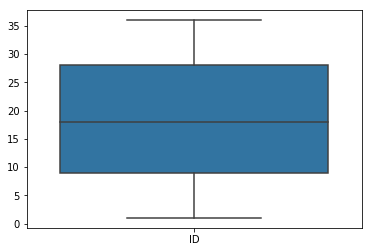

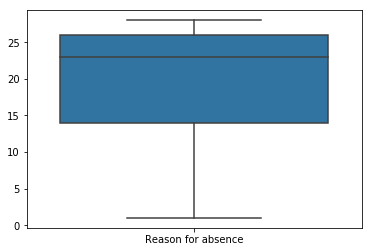

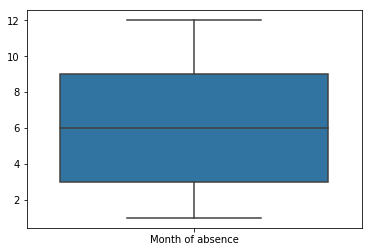

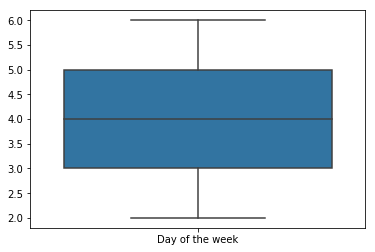

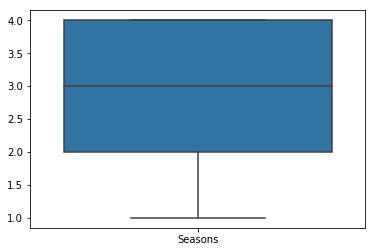

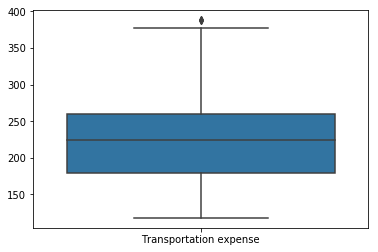

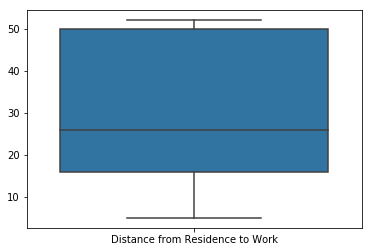

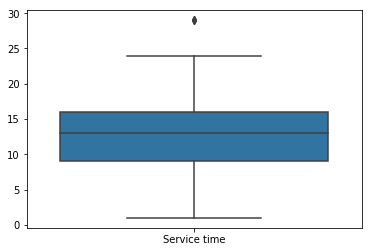

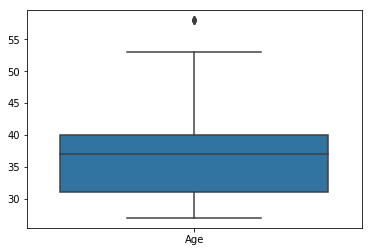

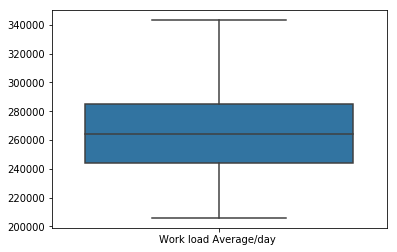

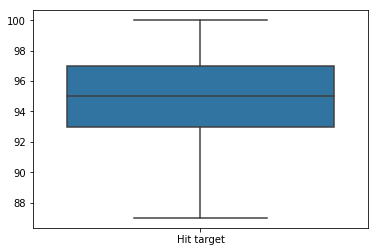

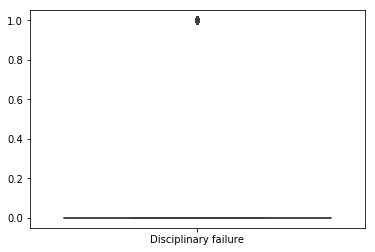

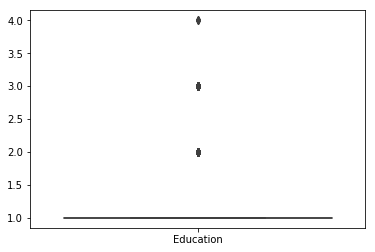

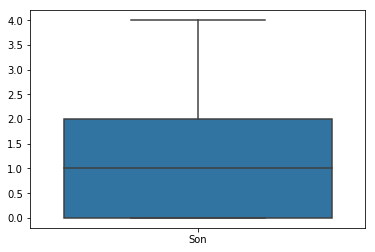

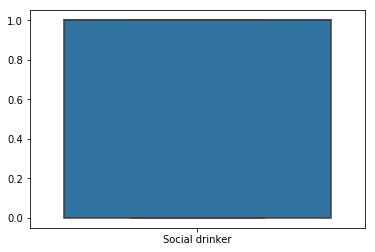

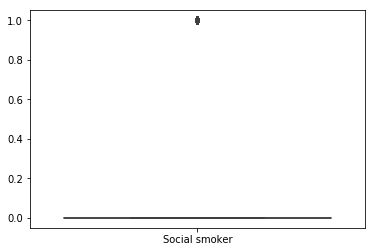

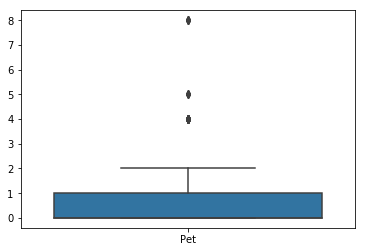

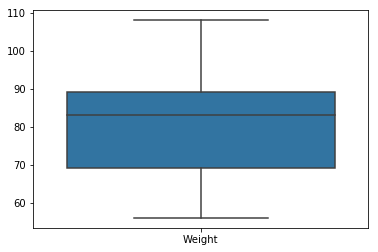

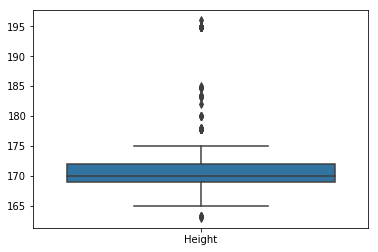

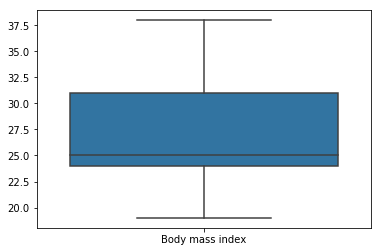

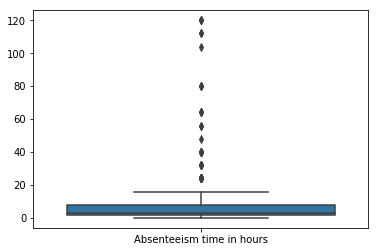

In [18]:
# For analysis plot the box plot again
for i in range(dataset.shape[1]):
    sb.boxplot(data=dataset.iloc[:,i:i+1])
    plt.savefig('./outlier/'+dataset.columns[i].replace('/',' ')+'_after.png')
    plt.show()

# Graphical Analysis

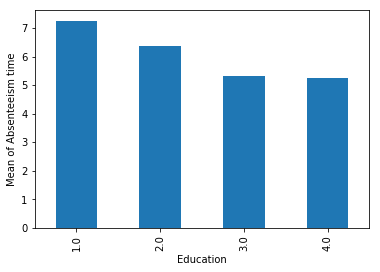

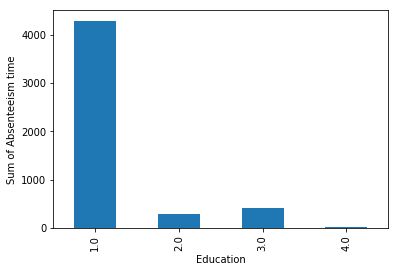

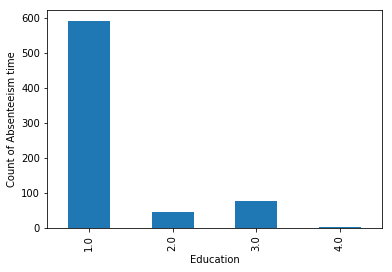

In [19]:
#Plot the bar graph for Absenteeism time in hours mean, sum, count with respect to educational 
#qualification of the employee
dataset.groupby(['Education'])['Absenteeism time in hours'].mean().plot.bar()
plt.ylabel("Mean of Absenteeism time")
plt.show()
dataset.groupby(['Education'])['Absenteeism time in hours'].sum().plot.bar()
plt.ylabel("Sum of Absenteeism time")
plt.show()
dataset.groupby(['Education'])['Absenteeism time in hours'].count().plot.bar()
plt.ylabel("Count of Absenteeism time")
plt.show()

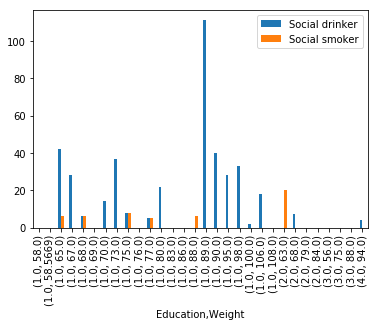

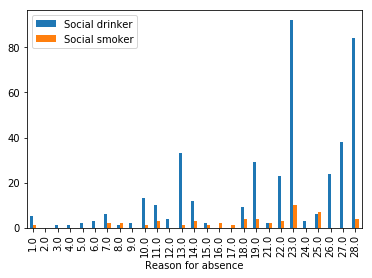

In [20]:
# Usually drinking smoking affects the weight so checking the drinking and smoking habbits wrt education and weight
dataset.groupby(['Education','Weight'])['Social drinker','Social smoker'].sum().plot.bar()
plt.show()
# Drinkig and smoking habbits are affected by the illness of an employee
dataset.groupby(['Reason for absence'])['Social drinker','Social smoker'].sum().plot.bar()
plt.show()

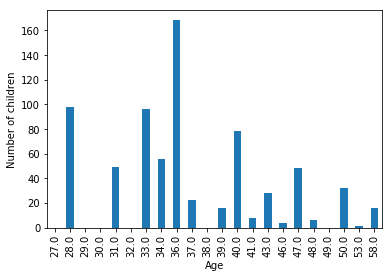

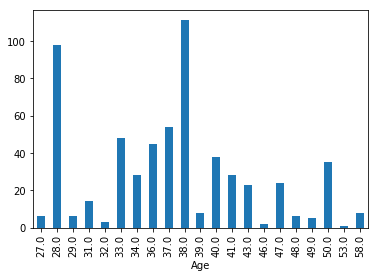

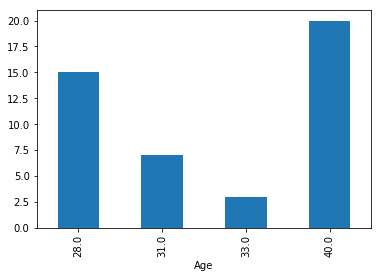

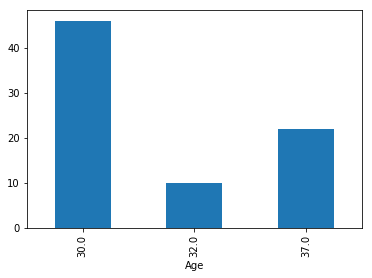

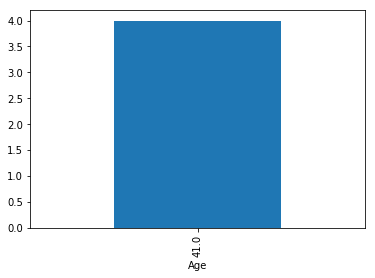

In [21]:
#plot of count of employees wrt the age groups with that education qualification
dataset.groupby(['Age'])['Son'].sum().plot.bar()
plt.ylabel('Number of children')
plt.show()
dataset[dataset['Education']==1].groupby(['Age'])['Education'].count().plot.bar()
plt.show()
dataset[dataset['Education']==2].groupby(['Age'])['Education'].count().plot.bar()
plt.show()
dataset[dataset['Education']==3].groupby(['Age'])['Education'].count().plot.bar()
plt.show()
dataset[dataset['Education']==4].groupby(['Age'])['Education'].count().plot.bar()
plt.show()

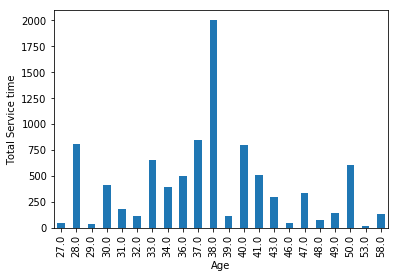

In [22]:
#Distribution of Service time with respect to age.
dataset.groupby(['Age'])['Service time'].sum().plot.bar()
plt.ylabel('Total Service time')
plt.show()

# Univariate Analysis

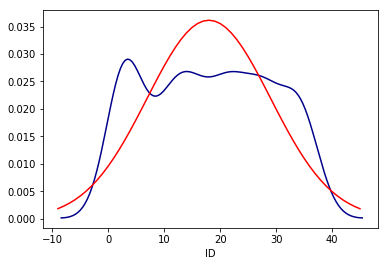

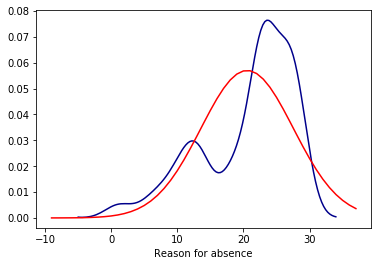

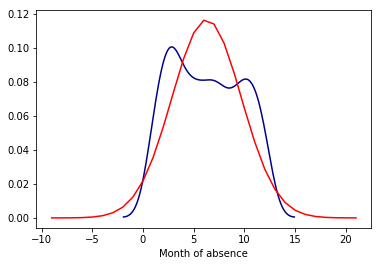

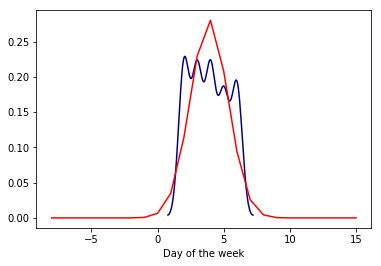

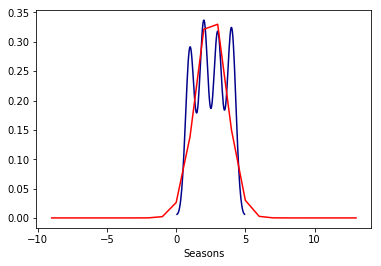

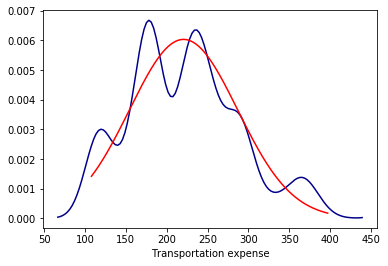

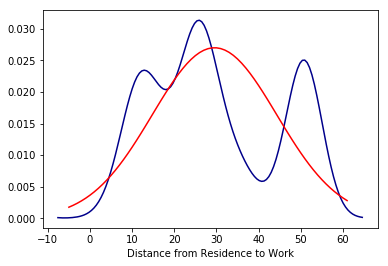

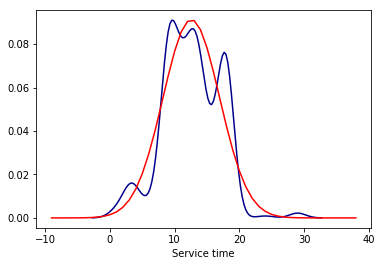

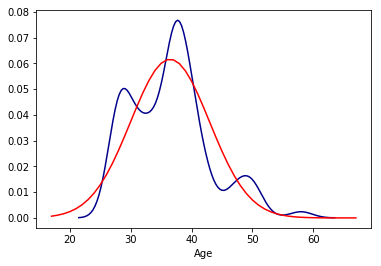

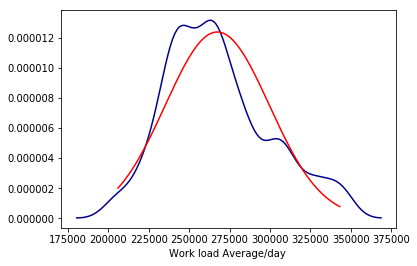

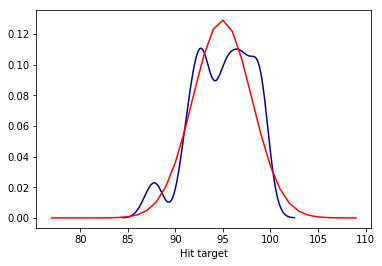

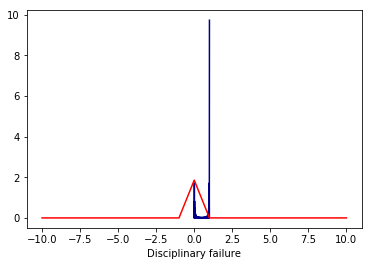

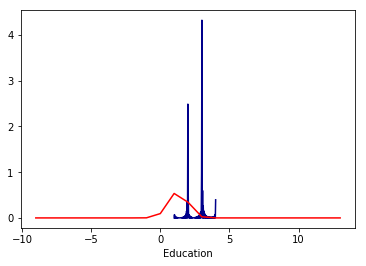

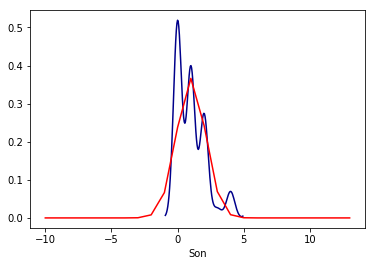

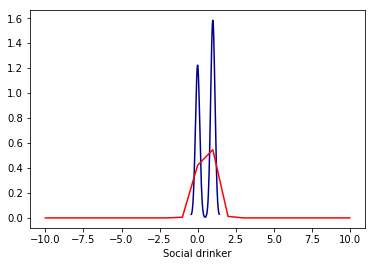

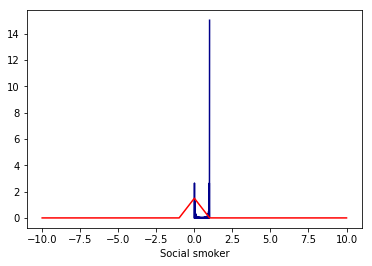

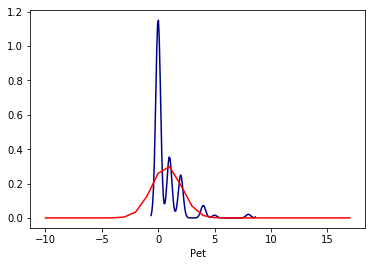

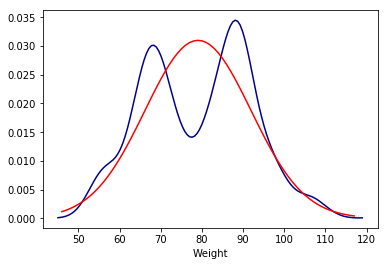

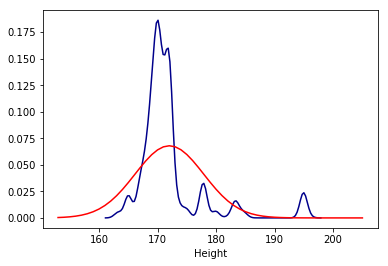

/home/sanket/.conda/envs/my_root/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/sanket/.conda/envs/my_root/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


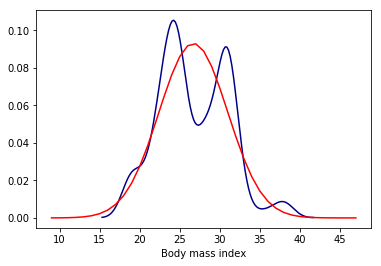

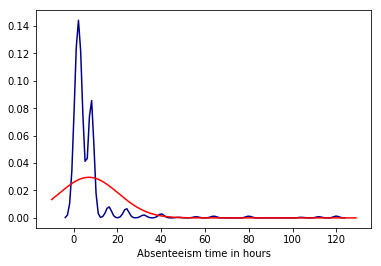

In [23]:
#Blue line to show the data distribution and red line for the normal distribution of the curve
for column in dataset.columns:
    sb.distplot(dataset[column], hist=False, kde=True, 
             bins=dataset[column].unique().size, color = 'darkblue')
    bins=np.array(range(int(min(dataset[column]))-10,int(max(dataset[column]))+10))
    mu,sigma=dataset[column].mean(),dataset[column].std()
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),color='red')
    plt.savefig('./univariate analysis/'+column.replace('/',' ')+'.png')
    plt.show()

# Bi variate Analysis

In [24]:
# sb.pairplot(dataset,size=5,diag_kind="kde")
# plt.show()

# Feature Selection

In [25]:
cat_vars=['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Disciplinary failure', 'Education', 'Son','Pet','Social drinker',
       'Social smoker']
cont_vars=['ID','Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
        'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

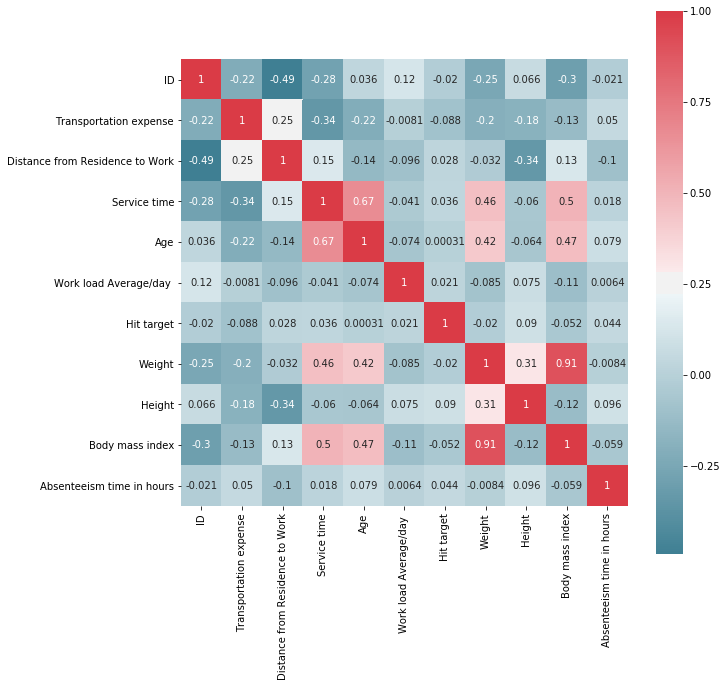

In [26]:
#Plot the correlation matrix
f, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(dataset[cont_vars].corr(), mask=np.zeros_like(dataset[cont_vars].corr(), dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True,ax=ax,annot=True)
plt.show()

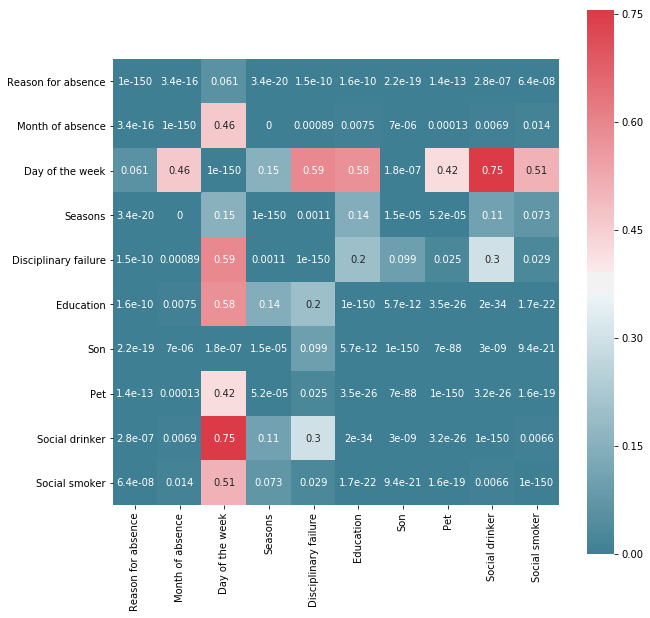

In [27]:
#Plot the chi-square matrix for categorical test.
all_vars=[]
for i in cat_vars:
    col_p_values=[]
    for j in cat_vars:
        if i!=j:
            
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(dataset[i], dataset[j]))
            col_p_values.append(p)
        else:
            col_p_values.append(10**(-150))
    all_vars.append(col_p_values)
f, ax = plt.subplots(figsize=(10, 10))
map=pd.DataFrame(all_vars, columns=cat_vars )
map.index=cat_vars
sb.heatmap(map, mask=np.zeros_like(all_vars, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True,ax=ax,annot=True)
plt.show()

In [28]:
#ANOVA test for the categorical and continious target variables.
for col in cat_vars:
    print(col,f_classif(X=dataset[col].values.reshape(-1,1),y=dataset['Absenteeism time in hours'])[1])

Reason for absence [3.7839085e-34]
Month of absence [0.00132978]
Day of the week [0.01483054]
Seasons [0.00402139]
Disciplinary failure [2.16420583e-290]
Education [0.48776212]
Son [3.34299369e-07]
Pet [0.0576525]
Social drinker [0.00200266]
Social smoker [0.42398522]


In [29]:
#Delete columns
dataset=dataset.drop(axis=1,labels=['Education', 'Social smoker', 'Pet','Body mass index'])
print(dataset.shape)

(718, 17)


# Model

In [30]:
dataset1=dataset.copy()

In [31]:
#Spliting the test and train data in 7:3 ratio
X_train, X_validation, Y_train, Y_validation=train_test_split(dataset.iloc[:,:-1], dataset.iloc[:,-1], test_size=0.3, random_state=3)

In [32]:
print(X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape)

(502, 16) (216, 16) (502,) (216,)


In [33]:
model = LinearRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print("Training R2 Score by Linear Regression:",model.score(X_train,Y_train))
print("Training MSE by Linear Regression:",mean_squared_error(Y_train,predictions))
predictions=model.predict(X_validation)
print("Validation R2 Score by Linear Regression:",model.score(X_validation,Y_validation))
print("Validation MSE by Linear Regression:",mean_squared_error(Y_validation,predictions))

Training R2 Score by Linear Regression: 0.17132994394302856
Training MSE by Linear Regression: 158.58924261101902
Validation R2 Score by Linear Regression: -0.015672297305646454
Validation MSE by Linear Regression: 160.26930499619954


In [34]:
model = DecisionTreeRegressor(max_features=8,random_state=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print("Training R2 Score by Decision tree:",model.score(X_train,Y_train))
print("Training MSE by Decision tree:",mean_squared_error(Y_train,predictions))
predictions=model.predict(X_validation)
print("Validation R2 Score by Decision tree:",model.score(X_validation,Y_validation))
print("Validation MSE by Decision tree:",mean_squared_error(Y_validation,predictions))

Training R2 Score by Decision tree: 0.9534445277316502
Training MSE by Decision tree: 8.909694555112882
Validation R2 Score by Decision tree: -0.8686703042850425
Validation MSE by Decision tree: 294.869212962963


In [35]:
model = RandomForestRegressor(n_estimators=25, max_features=11, max_depth=10, random_state=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print("Training R2 Score by Random Forest:",model.score(X_train,Y_train))
print("Training MSE by Random Forest:",mean_squared_error(Y_train,predictions))
predictions=model.predict(X_validation)
print("Validation R2 Score by Random Forest:",model.score(X_validation,Y_validation))
print("Validation MSE by Random Forest:",mean_squared_error(Y_validation,predictions))

Training R2 Score by Random Forest: 0.8042456358749466
Training MSE by Random Forest: 37.463084514133236
Validation R2 Score by Random Forest: -0.0779726282577835
Validation MSE by Random Forest: 170.10006514316797


In [36]:
#Normalization
for i in ['ID','Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Weight', 'Height']:
    print(i)
    X_train[i] = (X_train[i] - min(X_train[i]))/(max(X_train[i]) - min(X_train[i]))
    X_validation[i] = (X_validation[i] - min(X_train[i]))/(max(X_train[i]) - min(X_train[i]))

ID
Transportation expense
Distance from Residence to Work
Service time
Age
Work load Average/day 
Hit target
Weight
Height


In [37]:
model = LinearRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print("Training R2 Score by Linear Regression:",model.score(X_train,Y_train))
print("Training MSE by Linear Regression:",mean_squared_error(Y_train,predictions))
predictions=model.predict(X_validation)
print("Validation R2 Score by Linear Regression:",model.score(X_validation,Y_validation))
print("Validation MSE by Linear Regression:",mean_squared_error(Y_validation,predictions))

Training R2 Score by Linear Regression: 0.1713299439430285
Training MSE by Linear Regression: 158.58924261101905
Validation R2 Score by Linear Regression: -11208928.717390228
Validation MSE by Linear Regression: 1768727354.6034052


In [38]:
model = DecisionTreeRegressor(max_features=8,random_state=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print("Training R2 Score by Decision tree:",model.score(X_train,Y_train))
print("Training MSE by Decision tree:",mean_squared_error(Y_train,predictions))
predictions=model.predict(X_validation)
print("Validation R2 Score by Decision tree:",model.score(X_validation,Y_validation))
print("Validation MSE by Decision tree:",mean_squared_error(Y_validation,predictions))

Training R2 Score by Decision tree: 0.9534445277316502
Training MSE by Decision tree: 8.909694555112882
Validation R2 Score by Decision tree: -0.8870146912386783
Validation MSE by Decision tree: 297.7638888888889


In [39]:
model = RandomForestRegressor(n_estimators=25, max_features=11, max_depth=10, random_state=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print("Training R2 Score by Random Forest:",model.score(X_train,Y_train))
print("Training MSE by Random Forest:",mean_squared_error(Y_train,predictions))
predictions=model.predict(X_validation)
print("Validation R2 Score by Random Forest:",model.score(X_validation,Y_validation))
print("Validation MSE by Random Forest:",mean_squared_error(Y_validation,predictions))

Training R2 Score by Random Forest: 0.8042582834399796
Training MSE by Random Forest: 37.46066404805653
Validation R2 Score by Random Forest: -0.8793382977517636
Validation MSE by Random Forest: 296.55258259227253


In [40]:
#Add dummy variables
cat_vars=['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Disciplinary failure', 'Son', 'Social drinker']
cont_vars=['ID','Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
        'Weight', 'Height']
extended_dataset=pd.DataFrame(dataset.iloc[:,-1])
extended_dataset = extended_dataset.join(dataset[cont_vars[:-1]])
for i in cat_vars:
    temp = pd.get_dummies(dataset[i], prefix = i)
    extended_dataset = extended_dataset.join(temp)

In [41]:
X_train, X_validation, Y_train, Y_validation=train_test_split(extended_dataset, dataset.iloc[:,-1], test_size=0.3, random_state=3)

In [42]:
model = LinearRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print("Training R2 Score by Linear Regression:",model.score(X_train,Y_train))
print("Training MSE by Linear Regression:",mean_squared_error(Y_train,predictions))
predictions=model.predict(X_validation)
print("Validation R2 Score by Linear Regression:",model.score(X_validation,Y_validation))
print("Validation MSE by Linear Regression:",mean_squared_error(Y_validation,predictions))

Training R2 Score by Linear Regression: 1.0
Training MSE by Linear Regression: 3.892640582842456e-25
Validation R2 Score by Linear Regression: 1.0
Validation MSE by Linear Regression: 3.9187984980158583e-25


In [43]:
model = DecisionTreeRegressor(max_features=8,random_state=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print("Training R2 Score by Decision tree:",model.score(X_train,Y_train))
print("Training MSE by Decision tree:",mean_squared_error(Y_train,predictions))
predictions=model.predict(X_validation)
print("Validation R2 Score by Decision tree:",model.score(X_validation,Y_validation))
print("Validation MSE by Decision tree:",mean_squared_error(Y_validation,predictions))

Training R2 Score by Decision tree: 1.0
Training MSE by Decision tree: 0.0
Validation R2 Score by Decision tree: -0.04286482889560794
Validation MSE by Decision tree: 164.5601851851852


In [44]:
model = RandomForestRegressor(n_estimators=25, max_features=11, max_depth=10, random_state=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print("Training R2 Score by Random Forest:",model.score(X_train,Y_train))
print("Training MSE by Random Forest:",mean_squared_error(Y_train,predictions))
predictions=model.predict(X_validation)
print("Validation R2 Score by Random Forest:",model.score(X_validation,Y_validation))
print("Validation MSE by Random Forest:",mean_squared_error(Y_validation,predictions))

Training R2 Score by Random Forest: 0.9665638526762935
Training MSE by Random Forest: 6.398943996031746
Validation R2 Score by Random Forest: 0.7307022987467565
Validation MSE by Random Forest: 42.494174086883966


In [45]:
dataset=dataset1

# Suggestions

In [46]:
#Calculating the importance of the variables.
model=DecisionTreeRegressor(criterion="mse", max_features=8,random_state=1)
model.fit(dataset.iloc[:,:-1],dataset.iloc[:,-1])
imp_list=[]
for imp, name in zip(np.float32(model.feature_importances_),dataset.columns):
    imp_list.append([name,imp])
imp_list=sorted(imp_list,key=lambda x:x[1],reverse=True)
print(imp_list)
# dot_data = StringIO()
# export_graphviz(model, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png("decion tree2.png")

[['Day of the week', 0.23051986], ['Reason for absence', 0.18915196], ['Month of absence', 0.15729824], ['Work load Average/day ', 0.08366446], ['ID', 0.06846845], ['Distance from Residence to Work', 0.055564314], ['Seasons', 0.045025006], ['Age', 0.04463034], ['Height', 0.038617946], ['Social drinker', 0.021893933], ['Transportation expense', 0.019458419], ['Son', 0.019167522], ['Hit target', 0.014129688], ['Weight', 0.008909071], ['Disciplinary failure', 0.0023972238], ['Service time', 0.0011035694]]


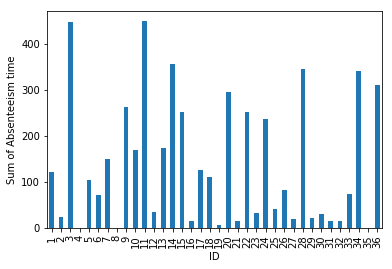

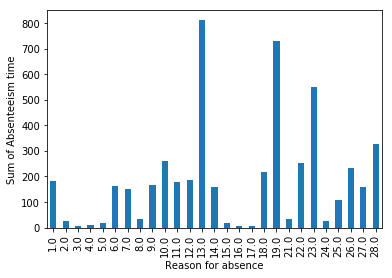

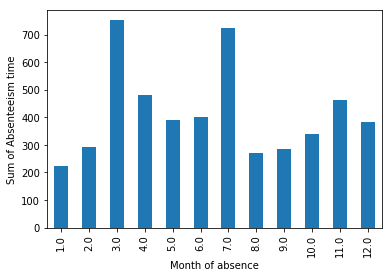

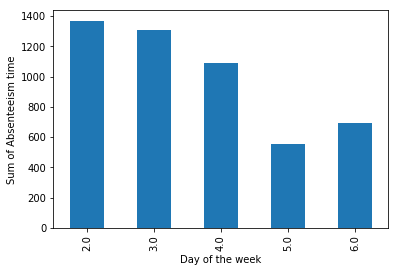

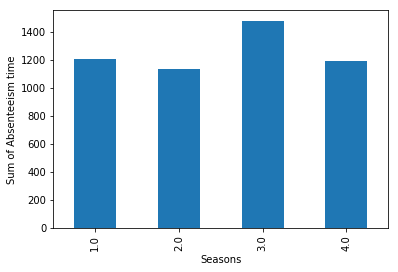

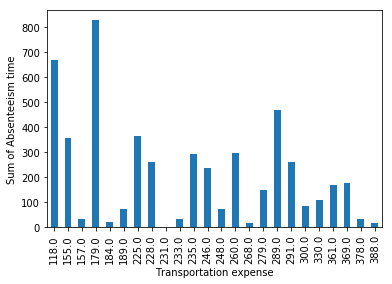

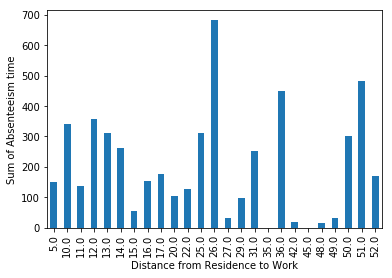

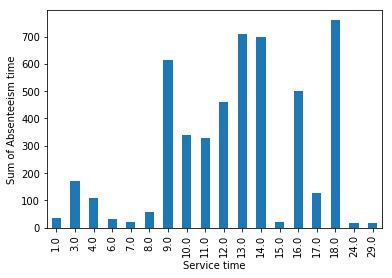

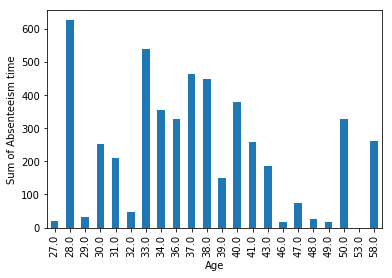

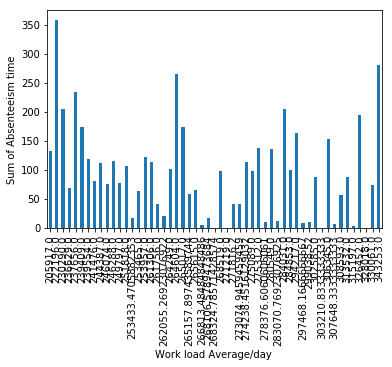

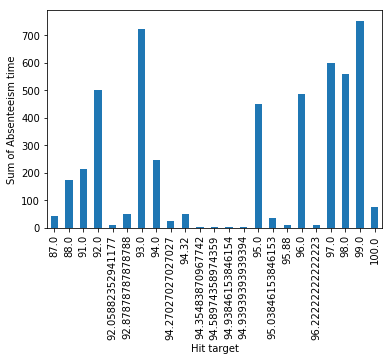

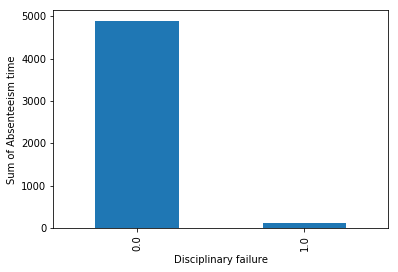

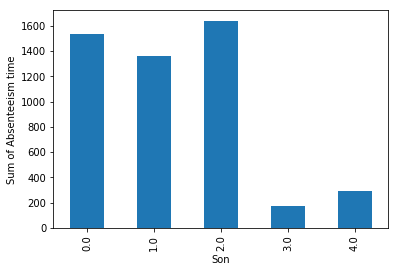

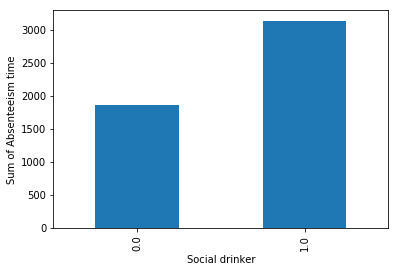

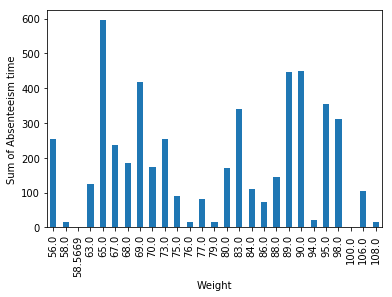

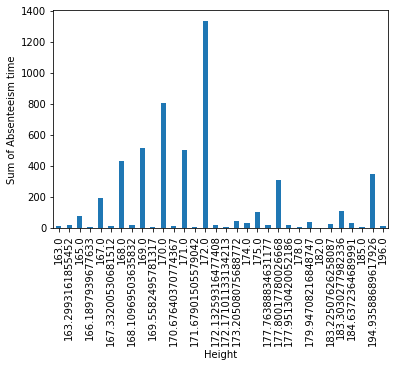

In [47]:
#Columns vs the sum of absenteeism time in hrs
for column in dataset.columns[:-1]:
    group=dataset.groupby([column])[dataset.columns[-1]].sum()
    group.plot.bar()
    plt.savefig('./'+column.replace('/',' ')+'_sum_inferences.png')
    plt.ylabel('Sum of Absenteeism time')
    plt.show()

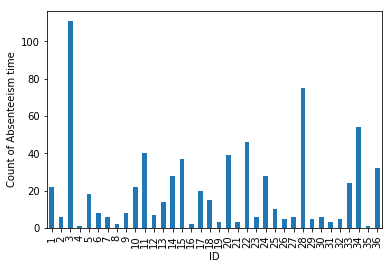

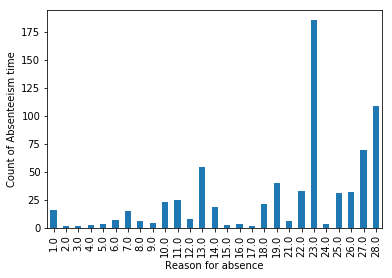

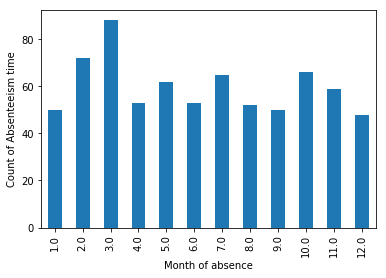

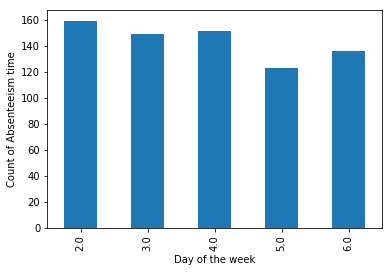

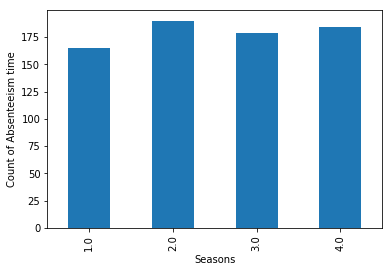

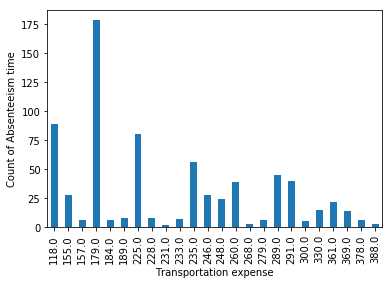

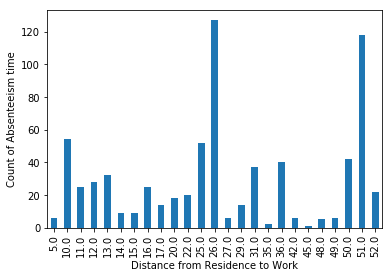

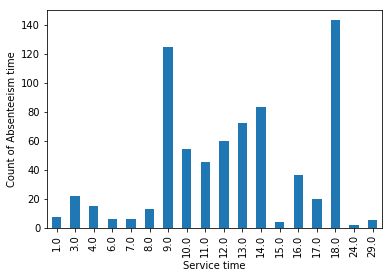

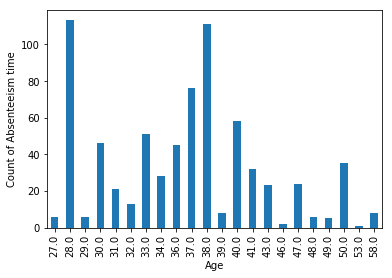

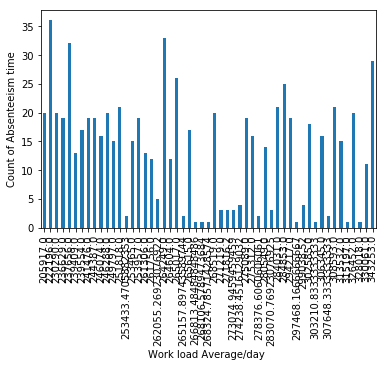

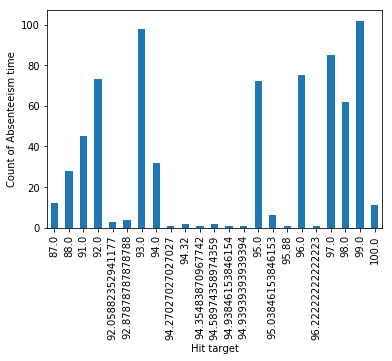

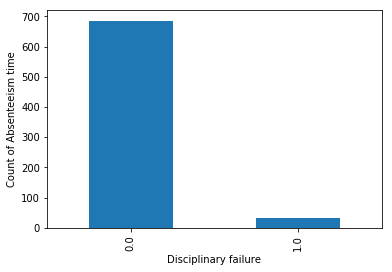

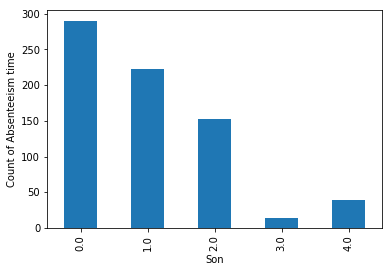

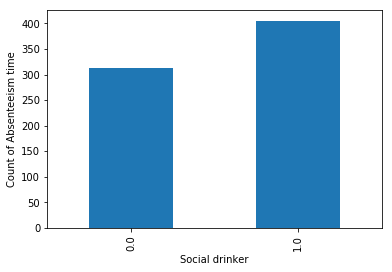

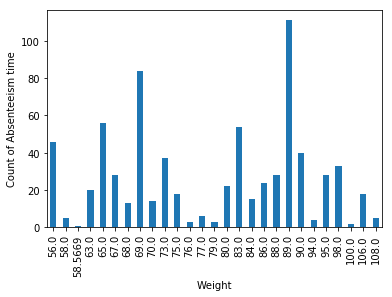

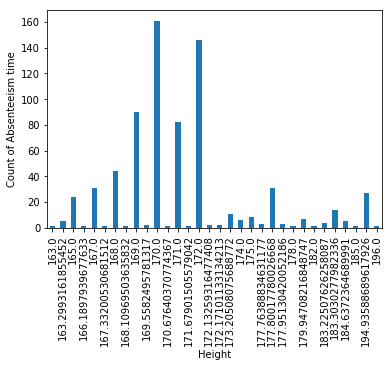

In [48]:
#Columns vs the count of absenteeism time in hrs
for column in dataset.columns[:-1]:
    group=dataset.groupby([column])[dataset.columns[-1]].count()
    group.plot.bar()
    plt.savefig('./'+column.replace('/',' ')+'_count_inferences.png')
    plt.ylabel('Count of Absenteeism time')
    plt.show()

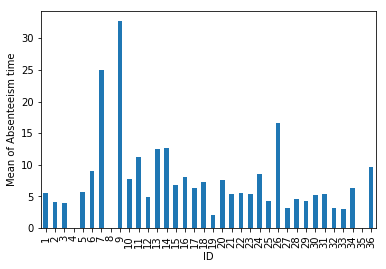

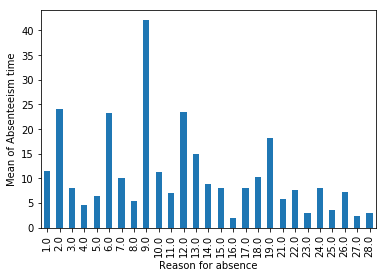

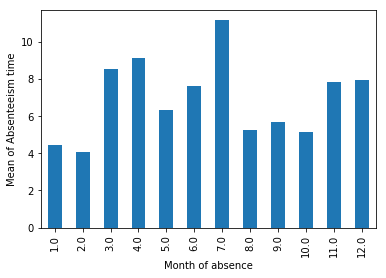

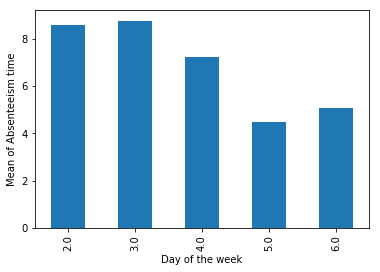

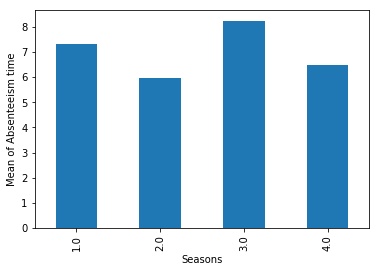

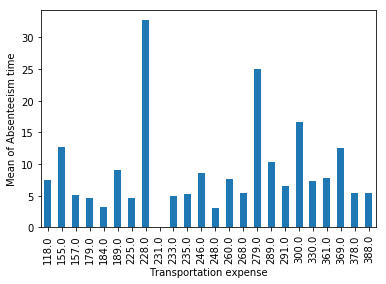

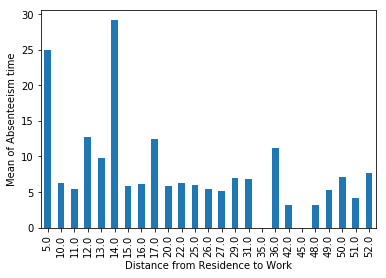

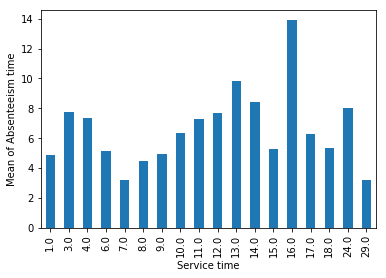

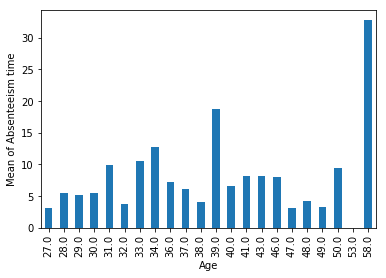

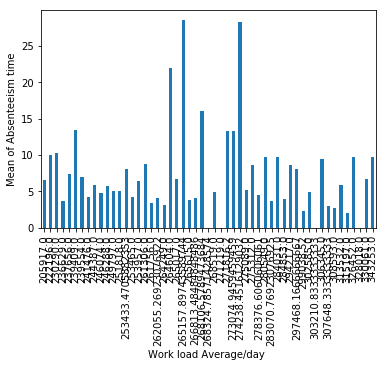

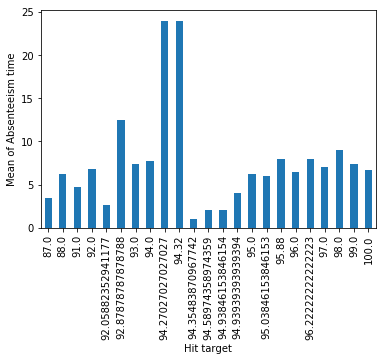

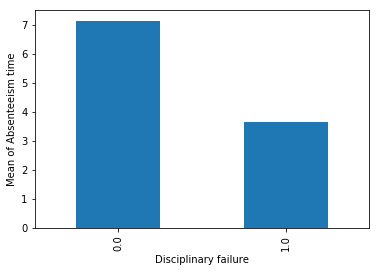

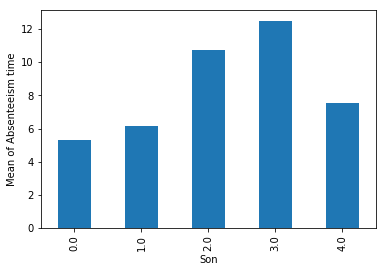

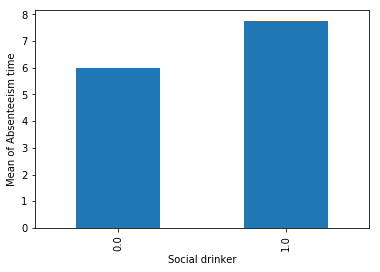

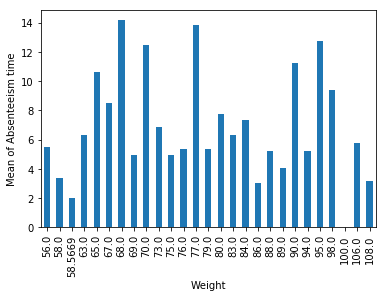

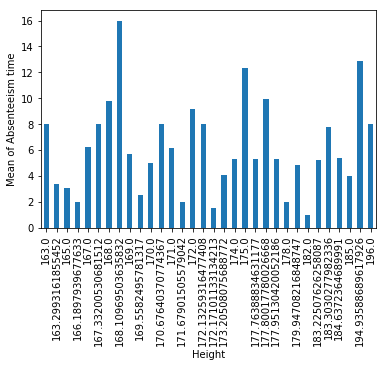

In [49]:
#Columns vs the mean of absenteeism time in hrs
for column in dataset.columns[:-1]:
    group=dataset.groupby([column])[dataset.columns[-1]].mean()
    group.plot.bar()
    plt.savefig('./'+column.replace('/',' ')+'_mean_inferences.png')
    plt.ylabel('Mean of Absenteeism time')
    plt.show()

# Trend in next year

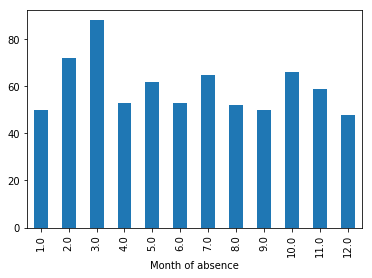

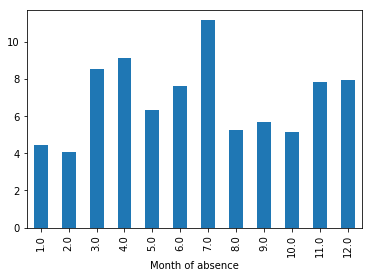

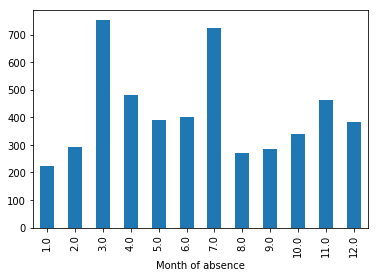

In [50]:
#Month of absence vs the sum, mean, count of absenteeism time in hrs
dataset.groupby(['Month of absence'])[dataset.columns[-1]].count().plot.bar()
plt.show()
dataset.groupby(['Month of absence'])[dataset.columns[-1]].mean().plot.bar()
plt.show()
dataset.groupby(['Month of absence'])[dataset.columns[-1]].sum().plot.bar()
plt.show()

In [51]:
#Total absenteeism time in hrs for the 12 months
dataset.groupby(['Month of absence'])['Absenteeism time in hours'].sum()[1:]

Month of absence
1.0     222.0
2.0     294.0
3.0     752.0
4.0     482.0
5.0     392.0
6.0     403.0
7.0     724.0
8.0     272.0
9.0     284.0
10.0    340.0
11.0    463.0
12.0    382.0
Name: Absenteeism time in hours, dtype: float64

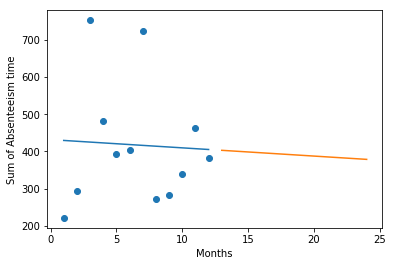

In [52]:
#Fitting the Linear regression on the month of absence and sum of absenteeism time
model = LinearRegression()
model.fit(np.reshape(range(1,13),(-1,1)),dataset.groupby(['Month of absence'])['Absenteeism time in hours'].sum())
plt.plot(np.reshape(range(1,13),(-1,1)),model.predict(np.reshape(range(1,13),(-1,1))))
# plt.show()
plt.scatter(np.reshape(range(1,13),(-1,1)),dataset.groupby(['Month of absence'])['Absenteeism time in hours'].sum())
# plt.show()
plt.plot(np.reshape(range(13,25),(-1,1)),model.predict(np.reshape(range(13,25),(-1,1))))
plt.xlabel('Months')
plt.ylabel('Sum of Absenteeism time')
plt.show()

In [53]:
print("Monthly work loss in 2011(Next Year)")
for month, loss in zip(np.reshape(range(1,25),(-1,1)),model.predict(np.reshape(range(1,25),(-1,1)))):
    print(month,loss)

Monthly work loss in 2011(Next Year)
[1] 429.6538461538462
[2] 427.44405594405595
[3] 425.23426573426576
[4] 423.0244755244755
[5] 420.81468531468533
[6] 418.6048951048951
[7] 416.3951048951049
[8] 414.18531468531467
[9] 411.9755244755245
[10] 409.7657342657343
[11] 407.55594405594405
[12] 405.34615384615387
[13] 403.1363636363636
[14] 400.92657342657344
[15] 398.71678321678326
[16] 396.506993006993
[17] 394.2972027972028
[18] 392.0874125874126
[19] 389.8776223776224
[20] 387.66783216783216
[21] 385.458041958042
[22] 383.24825174825173
[23] 381.03846153846155
[24] 378.82867132867136


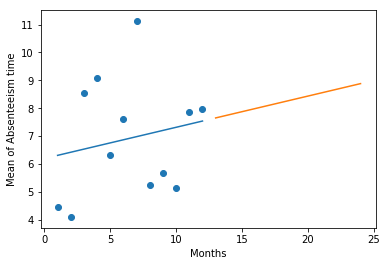

In [54]:
#Fitting the Linear regression on the month of absence and mean of absenteeism time
model = LinearRegression()
model.fit(np.reshape(range(1,13),(-1,1)),dataset.groupby(['Month of absence'])['Absenteeism time in hours'].mean())
plt.plot(np.reshape(range(1,13),(-1,1)),model.predict(np.reshape(range(1,13),(-1,1))))
# plt.show()
plt.scatter(np.reshape(range(1,13),(-1,1)),dataset.groupby(['Month of absence'])['Absenteeism time in hours'].mean())
# plt.show()
plt.plot(np.reshape(range(13,25),(-1,1)),model.predict(np.reshape(range(13,25),(-1,1))))
plt.xlabel('Months')
plt.ylabel('Mean of Absenteeism time')
plt.show()

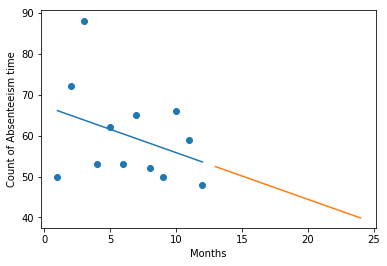

In [55]:
#Fitting the Linear regression on the month of absence and count of absenteeism time
model = LinearRegression()
model.fit(np.reshape(range(1,13),(-1,1)),dataset.groupby(['Month of absence'])['Absenteeism time in hours'].count())
plt.plot(np.reshape(range(1,13),(-1,1)),model.predict(np.reshape(range(1,13),(-1,1))))
# plt.show()
plt.scatter(np.reshape(range(1,13),(-1,1)),dataset.groupby(['Month of absence'])['Absenteeism time in hours'].count())
# plt.show()
plt.plot(np.reshape(range(13,25),(-1,1)),model.predict(np.reshape(range(13,25),(-1,1))))
plt.xlabel('Months')
plt.ylabel('Count of Absenteeism time')
plt.show()

# Inefficient Employee Analysis